# 原始資料

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([3.1,4.4,5.5,6.1,6.9,4.1,9.7,6.1,7.9,2.7,7.2,10.1,5.3,7.9,5.6,9.2,3.1,6.2,7.3,7.6,6.7,6.2])
y = np.array([1.7,2.1,2.0,1.9,2.6,1.3,3.3,2.6,2.3,1.1,2.7,3.5,1.6,2.9,2.4,2.9,1.3,2.3,2.5,1.9,2.6,2.2])

In [3]:
# 為了後續與TensorFlow weights運算資料型態一致
print('original type(x,y):', x.dtype, y.dtype)
x = x.astype('float32')
y = y.astype('float32')
print('new type(x,y):', x.dtype, y.dtype)

original type(x,y): float64 float64
new type(x,y): float32 float32


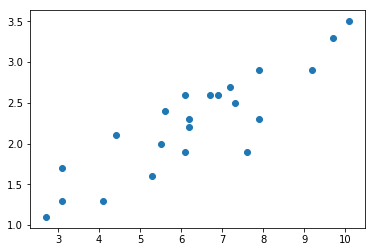

In [4]:
plt.scatter(x,y)

# 設定超參數
學習速率(learning_rate), 總訓練週期數(training_epochs)

In [5]:
learning_rate = 0.001
training_epochs = 20

# 建立 TensorFlow 計算圖

<b>objective function</b>: y = Wx + b

In [6]:
W = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.zeros([1]))
y_pred = tf.add(tf.multiply(x, W), b)

<b>cost function(MSE)</b>: mean(square(y - y_pred))

In [7]:
cost = tf.reduce_mean(tf.square(y_pred - y))

<b>optimizer</b>: Gradient Descent 

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

<b> R Squared Score

In [9]:
#with tf.name_scope('R_Squared'):
SS_res = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
SS_tot = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
R_squared = tf.subtract(1.0, tf.div(SS_res, SS_tot))

# 執行 Session: Tensor Flowing

weight/parameter [ 0.516505]
intercept [-0.01338392]
cost(MSE) 1.29624
R Squared Score -2.41394


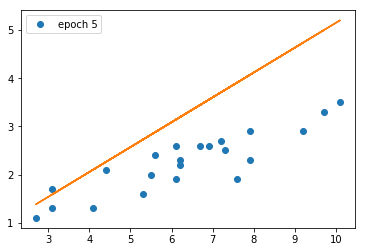

weight/parameter [ 0.45618233]
intercept [-0.02156786]
cost(MSE) 0.575854
R Squared Score -0.516642


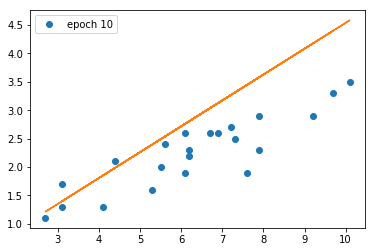

weight/parameter [ 0.41841128]
intercept [-0.02649838]
cost(MSE) 0.293795
R Squared Score 0.226225


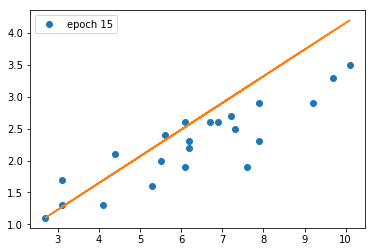

weight/parameter [ 0.39475071]
intercept [-0.02939341]
cost(MSE) 0.183338
R Squared Score 0.517137


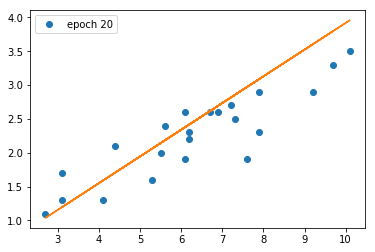

In [10]:
costs = []
with tf.Session() as sess:
    # 初始化所有Variables
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(1,training_epochs+1):
        sess.run(train)
        epoch_cost = sess.run(cost)
        costs.append(epoch_cost)
        
        if(epoch % 5 == 0):
            # show training result 
            print('weight/parameter',sess.run(W))
            print('intercept',sess.run(b))
            print('cost(MSE)',epoch_cost)
            print('R Squared Score',sess.run(R_squared))
            plt.plot(x, y, 'o', label='epoch '+ str(epoch))
            plt.plot(x, sess.run(y_pred))
            plt.legend()
            plt.show()
    
    # 輸出計算圖至TensorBoard
    writer = tf.summary.FileWriter("log_lr/", graph = sess.graph)

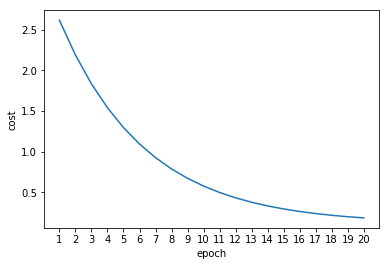

In [11]:
plt.ylabel('cost')
plt.xlabel('epoch')
xticks = [i+1 for i in range(training_epochs)]
plt.xticks([i+1 for i in range(training_epochs)])
plt.plot(xticks, costs)
plt.show()

# TensorBoard

In [ ]:
# 啟動TensorBoard
!tensorboard --logdir=log_lr

TensorBoard 0.1.6 at http://pyda:6006 (Press CTRL+C to quit)
